In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.

#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

In [6]:
AruodasSar = pd.read_csv('uzduotisnuo2iki11.csv' , sep=';')   
AruodasSar.head()

,Unnamed: 0,Adresas,Kaina,Kaina_uz_m2,Plotas,Kambariu_skaicius
0,0,"Palanga, A. Mickevičiaus g.",268000,7657,35.00,2.0
1,1,"Palanga, A. Mickevičiaus g.",329900,7331,45.00,3.0
2,2,"Vilnius, Žirmūnai, Tuskulėnų g.",171200,4248,40.30,2.0
3,3,"Palanga, Palanga, Vanagupės g.",199000,4095,48.59,2.0
4,4,"Vilnius, Žirmūnai, Kareivių g.",240529,3733,64.44,3.0


In [65]:
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.

Pigus = []
Brangus = []
Neiperkami = []
VDU = 1902

# PigusButai = AruodasSar["Kaina_uz_m2"]<=VDU
# len(AruodasSar[PigusButai])              #uzklausos su sql kalbos alternatyva

for kaina in AruodasSar["Kaina_uz_m2"]:
    if kaina <= VDU:
        Pigus.append(kaina)
    elif kaina >= VDU*3:
        Neiperkami.append(kaina)
    else: 
        Brangus.append(kaina)
print("Kvadratu kainos vidurkis:" ,VDU)
print("Pigus butai:" ,Pigus)
print("Brangus butai:" ,Brangus)
print("Itin brangus butai:" ,Neiperkami)

Kvadratu kainos vidurkis: 1902
Pigus butai: [1564, 952, 1770, 1188, 1719, 1576, 826, 1895, 963, 1856, 659, 1858, 1711, 1204, 1825, 1735, 1343, 141, 1231, 565, 1136, 1058, 1404, 1287, 1565, 688, 1042, 552, 1161, 807, 1462, 1023, 682, 490, 1000, 1082, 1250, 1161]
Brangus butai: [4248, 4095, 3733, 3453, 2439, 2317, 2462, 2651, 2647, 3901, 5438, 4545, 2183, 2616, 3604, 4058, 3478, 2808, 2406, 3148, 2599, 2921, 4285, 2350, 4011, 4137, 2440, 2488, 2213, 3652, 3325, 5477, 2218, 2764, 2687, 3782, 2617, 3000, 4844, 3135, 3018, 3152, 3415, 2024, 2645, 4906, 3092, 2887, 2731, 3636, 4327, 2467, 3773, 2963, 2849, 3900, 3850, 2750, 4000, 4082, 2420, 3881, 2745, 2532, 2535, 3139, 2916, 1906, 2299, 3440, 2750, 2880, 2504, 2150, 2297, 4375, 3773, 3700, 3907, 3160, 2813, 3044, 5111, 3183, 3183, 2091, 2195, 3525, 4033, 4541, 3961, 3641, 2070, 2191, 2692, 1961, 3687, 2382, 2518, 5205, 3384, 3476, 3378, 3462, 3141, 2786, 2206, 3315, 3057, 4202, 3093, 3350, 3972, 3196, 3580, 5230, 2758, 2985, 2090, 3083, 21

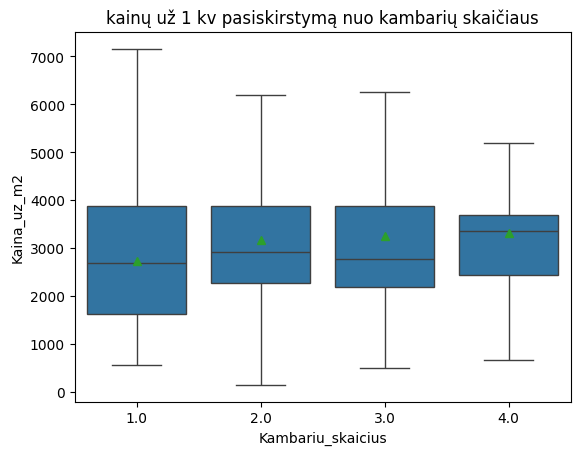

In [27]:
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
ax =sns.boxplot(data=AruodasSar.sort_values(by="Kambariu_skaicius"), x="Kambariu_skaicius" , y="Kaina_uz_m2", showmeans = True, showfliers = False)       #seaborn sugrupuoja ,suranda vidurkius pats
ax.set_title("kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus")
plt.show()

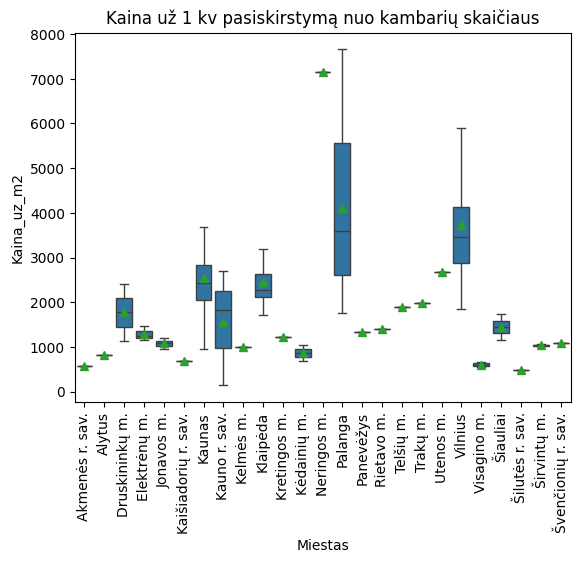

In [38]:
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.

# AruodasSar["miestas"] = AruodasSar["Adresas"].str.split(",").str[0]

def miestaiAtskirai(adresas):
    return adresas.split(",")[0]
AruodasSar["Miestas"] = AruodasSar["Adresas"].apply(miestaiAtskirai)

grafikas  =sns.boxplot(data=AruodasSar.sort_values(by="Miestas"), x="Miestas" , y="Kaina_uz_m2", showmeans = True, showfliers = False)       #seaborn sugrupuoja ,suranda vidurkius pats
grafikas.set_title("Kaina už 1 kv pasiskirstymą nuo kambarių skaičiaus")
plt.xticks(rotation=90) 
plt.show()

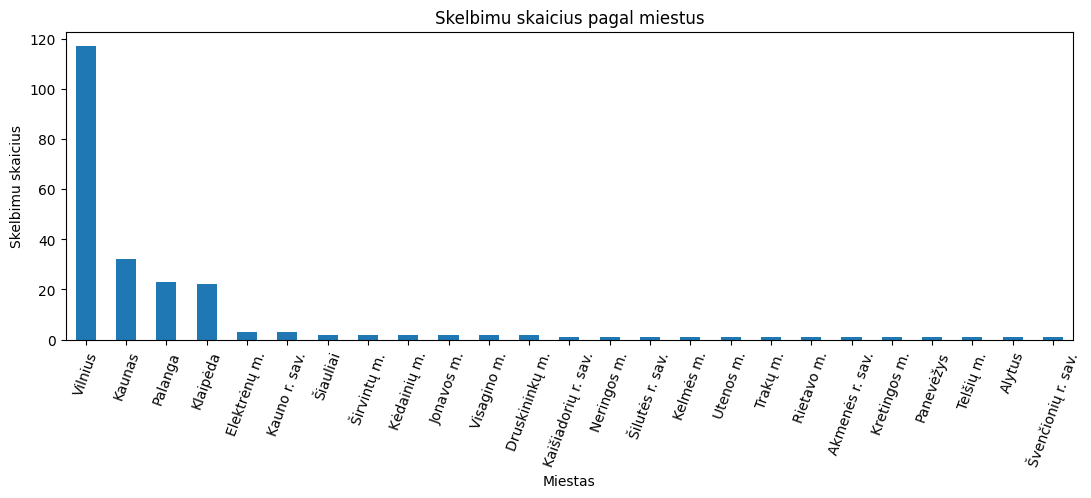

In [58]:
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?
skelbimai = AruodasSar["miestas"].value_counts()

skelbimai.plot(kind="bar", figsize=(13,4))
plt.title("Skelbimu skaicius pagal miestus")
plt.xlabel("Miestas")
plt.ylabel("Skelbimu skaicius")
plt.xticks(rotation=70)
plt.show()